# Capítulo 5: Computación Numérica

### Paquetes matemáticos en Python:

* NumPy: Numeric Python
* SciPy: Scientific Python
* Sympy: Symbolic Python

### Datos Tabulares y Series de tiempo

* **pandas**

### Visualización gráfica de información:

* matplotlib

## Pandas

Funcionalidades para manipulación de datos en formato tabular y series de tiempo:

* Acceso eficiente a datos mediante índices
* Carga de datos desde archivos
* Gestión de datos faltantes
* Slicing avanzado
* Agrupamiento de datos para calcular valores agregados
* Manejo de series de tiempo

### Estructuras de datos fundamentales

Series

* Arreglo de una dimensión
* Almacena elementos de un solo tipo
* Acceso a elementos mediante un índice

Data Frame

* Estructura bidimensional (tabla)
* Cada columna es un objeto de tipo Series
* Diferentes columnas almacenan diferentes tipos de valores
* Similar a una hoja de Excel

### La estructura de datos Series

In [ ]:
import pandas as pd
import numpy as np

edad = np.random.randint(15, 100, 5)
serie_edad = pd.Series(edad)
print(serie_edad)

### La estructura de datos DataFrame

In [ ]:
edad = np.random.randint(15, 100, 5)
peso = np.random.randint(35, 85, 5)
datos_personas = pd.DataFrame(np.column_stack([edad, peso]), columns=['edad', 'peso'])
print(datos_personas)
print('\nTipo de datos de la columna edad: ', type(datos_personas['edad']))

In [ ]:
columnas = ['nombre', 'edad', 'genero', 'ocupacion']

personas1 = pd.DataFrame(
    [
        ['Alicia', 19, 'F', 'estudiante'],
        ['Juan', 26, 'M', 'estudiante']
    ], columns=columnas
)

personas2 = pd.DataFrame(
    {
        'nombre': ['Pedro', 'Julia'],
        'edad': [33, 44],
        'genero': ['M', 'F'],
        'ocupacion': ['ingeniero', 'profesor'],
    }
)

print(personas1)
print('\n', personas2)
personas = pd.concat([personas1, personas2])
print('\n', personas)

In [ ]:
print('Filas, Columnas:', personas.shape)
print('Celdas:', personas.size)
print('Columna índice:', personas.index.tolist())
print('Columnas:', personas.columns.tolist())
print('Edad máxima: ', personas['edad'].max())
print('Edad promedio: ', personas['edad'].mean())

### Acceder a datos de una o más columnas

In [ ]:
print('Columna nombre:\n', personas['nombre'])
print('\n', personas[['nombre', 'ocupacion']])

### Acceder a elementos específicos de un data frame

* iloc: Acceder a elementos mediante fila, columna (posición)
* loc: Acceder a elementos por índice o condiciones lógicas

In [ ]:
print('1ra. fila:\n', personas.iloc[0], '\n')
print('1ra. fila, 1ra. columna (1ra. celda):', personas.iloc[0, 0], '\n')
print('2da. y 3ra. filas, 1ra. y 4ta. columnas:\n', personas.iloc[1:3, [0, 3]])
print('\n1ra. fila como arreglo de numpy:', personas.iloc[0].to_numpy())

In [ ]:
print('Filas con índice 0:\n', personas.loc[0])
print('\nFilas con índice 1:\n', personas.loc[1, ['genero', 'nombre']])

### Los elementos de Series y DataFrame son mutables

In [ ]:
copia_personas = personas.copy()
print('Datos originales:\n', copia_personas)
copia_personas.iloc[0, 1] = 60
copia_personas.iloc[1:, 1] = [20, 21, 22]
print('\nEdades modificadas:\n', copia_personas)

### Reindexar un data frame

In [ ]:
print('Índice original: ', personas.index.tolist())
personas.index = ['usuario ' + str(i + 1) for i in range(personas.shape[0])]
print('Índice modificado: ', personas.index.tolist())
print('Edad de usuario 3:', personas.loc['usuario 3', 'edad'])

### Filtrar elementos usando una condición lógica

In [ ]:
print('Personas menores a 30 años:\n', personas.loc[personas['edad'] < 30])
print('\nPersonas menores a 30 años y de género femenino:\n',
      personas.loc[(personas['edad'] < 30) & (personas['genero'] == 'F')])

### Ordenar filas

In [ ]:
print('Ordenado por nombre:\n', personas.sort_values(by='nombre'))
print('\nOrdenado primero por género y luego por ocupación:\n',
      personas.sort_values(by=['genero', 'ocupacion']))

### Leer datos de archivo CSV

In [ ]:
llamadas = pd.read_csv('/content/phone_data.csv', sep=',', index_col=0, parse_dates=[1])
print(llamadas)
print()
llamadas.describe()

### Operaciones con fechas

In [ ]:
fechas = llamadas.loc[:, 'fecha']

print(fechas)
print('\n1ra. fecha: ', fechas[0])
print('Mes de la 1ra. fecha: ', fechas[0].month)
print('Año de la 1ra. fecha: ', fechas[0].year)
print('Día de la semana de la 1ra. fecha: ', fechas[0].dayofweek)
print('Diferencia entre fecha 1 y fecha 101: ', fechas[100] - fechas[0])

### Resultados agregados (agrupación)

In [ ]:
print('Cantidad de llamadas por red telefónica:\n', llamadas.groupby('red').count())
print('\nDuración promedio por red y tipo de comunicación:\n', llamadas.groupby(['red', 'item']).mean('duracion'))

## Series de Tiempo

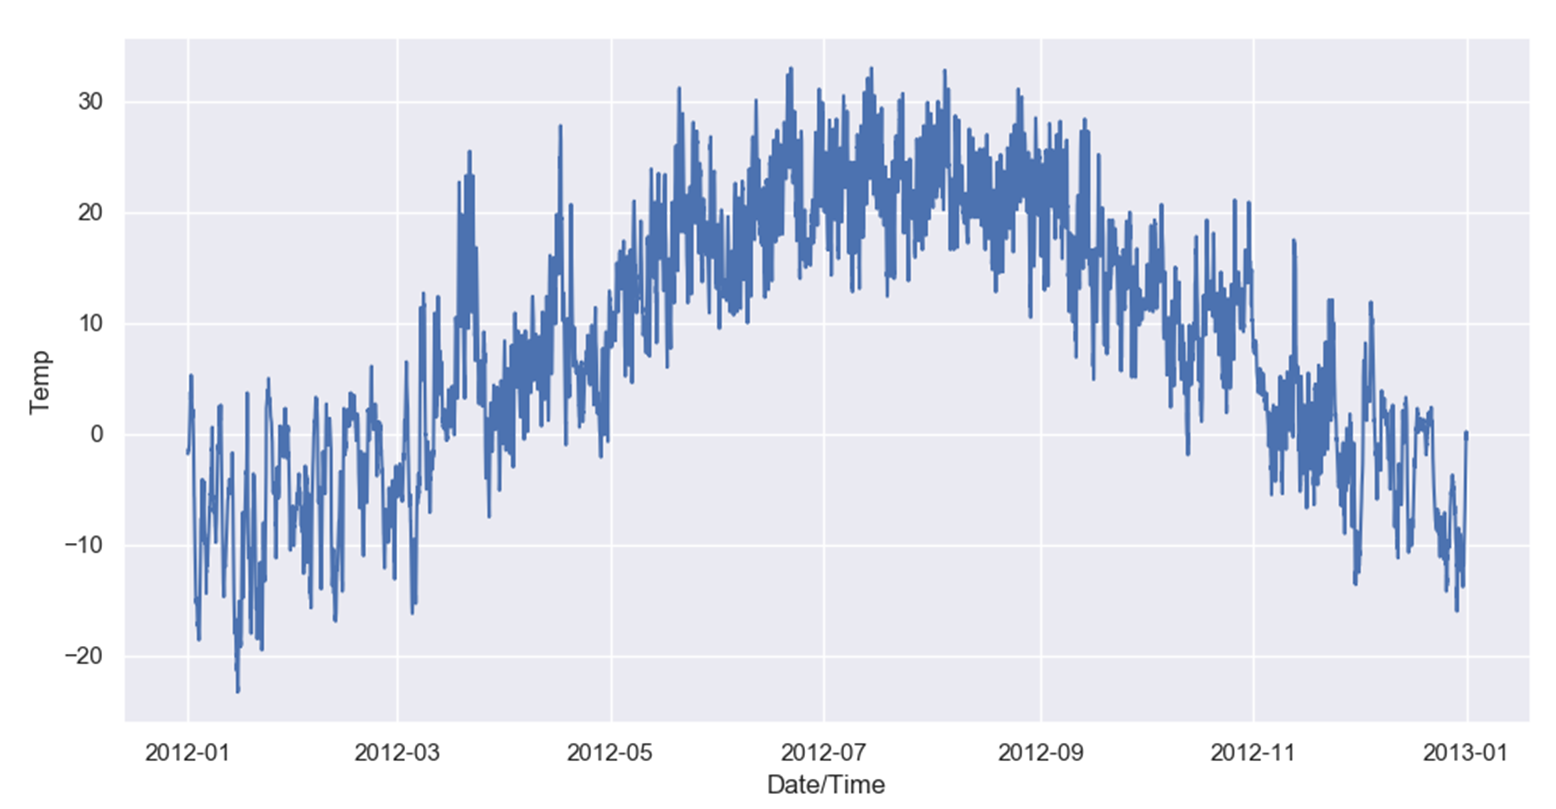

In [ ]:
clima = pd.read_csv('/content/weather_2012.csv', sep=',', index_col=0, parse_dates=[0])
print(clima)
#clima.head(10)
#clima.tail(10)
#clima.describe
#print(clima.loc[clima['Weather'] == 'Fog', 'Visibility'])

### Condensar datos

In [ ]:
lecturas_niebla = clima.loc[clima['Weather'] == 'Fog']
niebla_semanal = lecturas_niebla.resample('W').mean(['Temp', 'Dew_Point_Temp', 'Rel_Hum', 'Wind_Spd', 'Visibility'])
lecturas_niebla.head(100)
niebla_semanal.head(100)